### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading dataset

In [4]:
data = pd.read_excel('iris.xls')

### Observing details of data

In [5]:
data.shape

(150, 5)

In [6]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Dataset has four features:: Sepal Length, Sepal Width, Petal Length, and Petal Width.
#### The last feature, 'Classification,' is the target feature that should be predicted.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Checking the number of samples of each class in 'Classification' 

In [8]:
data['Classification'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Classification, dtype: int64

### statistical summmary

In [9]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Handling missing value

In [10]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [11]:
data.fillna(data.mean(), inplace=True)

In [12]:
print(data.isnull().sum())

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64


### Correlation

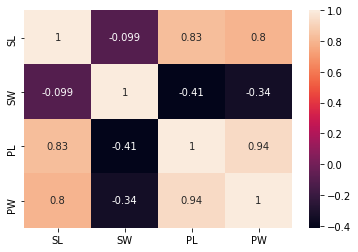

In [13]:
sns.heatmap(data.corr(), annot = True);

####  The SW and SL are not correlated the PW and PL are highly correlated
####  Will use all the features for training the algorithm and check the accuracy

### Boxplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029795184908>,
      dtype=object)

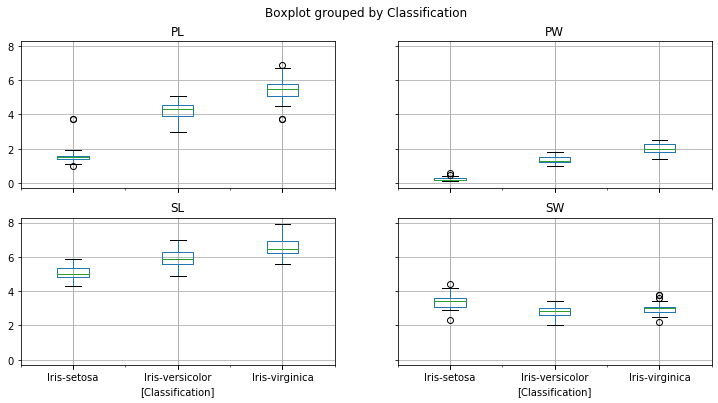

In [14]:
data.boxplot(by="Classification", figsize=(12, 6))

### Seperating data into dependent and independent values

In [15]:
X = data.drop(['Classification'], axis=1)
y = data['Classification']

### Encoding (Label encoder)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### Splitting dataset to training set and test set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape[1]

4

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model = log_model.fit(X_train,y_train)
y_pred = log_model.predict(X_test)

In [20]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [21]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [22]:
### accuracy score
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy is',accuracy_score(y_pred,y_test))

Logistic regression accuracy is 1.0


In [33]:
## cross validation to ensure model's strength since accuracy is high
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(log_model, X_train, y_train, cv=10)
print(np.mean(lr_scores))

C:\Users\farsana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\farsana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

0.9166666666666666


C:\Users\farsana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\farsana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

### Without any adjustments or tuning, this model is already performing very well with a test score/accuracy  of 100% 
 
### And cross validation score of .916 (91.6%)

## K Nearest Neighbours

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
metric_k =[]
neighbors = np.arange(3,15)

for k in neighbors:
    knn_classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    knn_classifier.fit(X_train,y_train)
    y_predictions = knn_classifier.predict(X_test)
    knn_acc = accuracy_score(y_test,y_predictions)
    metric_k.append(knn_acc)

In [27]:
metric_k

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

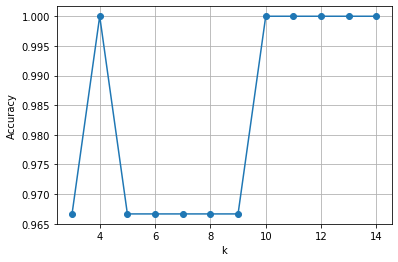

In [28]:
plt.plot(neighbors,metric_k, 'o-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()   

In [29]:
# understood 4 and then 10 to rest has highest value/accuracy
knn_classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
knn_classifier.fit(X_train,y_train)
y_predictions = knn_classifier.predict(X_test)
print('KNN accuracy = ',accuracy_score(y_test,y_predictions))

KNN accuracy =  1.0


In [32]:
#cross validation
from sklearn.model_selection import cross_val_score
knn_scores = cross_val_score(knn_classifier, X_train, y_train, cv=10)
print('knn cv scores = ',np.mean(knn_scores))

knn cv scores =  0.9333333333333333


### Without tuning accuracy is 1 and cross validation score in .93 (93%)

## SVM

In [34]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel = 'linear')
svm_classifier = svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix

# predictions made by the classifier
print(confusion_matrix(y_test, y_pred_svm))

# Accuracy score
print('SVM accuracy is',accuracy_score(y_test,y_pred_svm))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
SVM accuracy is 1.0


In [37]:
## cross validation
svm_scores = cross_val_score(svm_classifier, X_train, y_train, cv=10)
print('knn cv scores = ',np.mean(svm_scores))

knn cv scores =  0.95


In [39]:
svm_classifier1 = SVC(kernel = 'rbf')
svm_classifier1 = svm_classifier1.fit(X_train, y_train)

y_pred_svm1 = svm_classifier1.predict(X_test)

print(confusion_matrix(y_test, y_pred_svm))

print('SVM accuracy is',accuracy_score(y_test,y_pred_svm))

svm_scores = cross_val_score(svm_classifier1, X_train, y_train, cv=10)
print('knn cv scores = ',np.mean(svm_scores))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
SVM accuracy is 1.0
knn cv scores =  0.9333333333333333


## Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dt_cls = DecisionTreeClassifier()
dt_cls = dt_cls.fit(X_train, y_train)

y_pred_dt = dt_cls.predict(X_test)

print(confusion_matrix(y_test, y_pred_dt))

# Accuracy score
print('Decision tree accuracy is',accuracy_score(y_test,y_pred_dt))

svm_scores = cross_val_score(dt_cls, X_train, y_train, cv=10)
print('DT cv scores = ',np.mean(svm_scores))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Decision tree accuracy is 1.0
DT cv scores =  0.9166666666666666


##  Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf_cls = RandomForestClassifier()
rf_cls = rf_cls.fit(X_train,y_train)
y_pred_rf = rf_cls.predict(X_test)

In [42]:
confusion_matrix(y_test, y_pred_rf)

# Accuracy score
print('Random Forest accuracy is',accuracy_score(y_test,y_pred_rf))

svm_scores = cross_val_score(rf_cls, X_train, y_train, cv=10)
print('RF cv scores = ',np.mean(svm_scores))

Random Forest accuracy is 1.0
RF cv scores =  0.9333333333333332


## The accuracy rate of all algorithm appears similar before tuning in the dataset
## But if cross validation is cosidered, KNN and SVM algorithms performs slightly 
## better than the rest in this given dataset